# Exploratory Data Analysis

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

import warnings
warnings.filterwarnings('ignore')

In [47]:
book_data = pd.read_csv('books_data.csv')
book_data

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,['Religion'],NaN
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,2005-02,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,['Fiction'],NaN
4,"Nation Dance: Religion, Identity and Cultural ...",NaN,['Edward Long'],NaN,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,2003-03-01,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
212399,The Orphan Of Ellis Island (Time Travel Advent...,"During a school trip to Ellis Island, Dominick...",['Elvira Woodruff'],http://books.google.com/books/content?id=J7M-N...,http://books.google.com/books?id=J7M-NwAACAAJ&...,Scholastic Paperbacks,2000-06-01,http://books.google.com/books?id=J7M-NwAACAAJ&...,['Juvenile Fiction'],2.0
212400,Red Boots for Christmas,Everyone in the village of Friedensdorf is hap...,NaN,http://books.google.com/books/content?id=3n8k6...,http://books.google.com/books?id=3n8k6wl4BbYC&...,NaN,1995,http://books.google.com/books?id=3n8k6wl4BbYC&...,['Juvenile Fiction'],NaN
212401,Mamaw,"Give your Mamaw a useful, beautiful and though...",['Wild Wild Cabbage'],NaN,http://books.google.com/books?id=zytVswEACAAJ&...,NaN,2018-01-17,http://books.google.com/books?id=zytVswEACAAJ&...,NaN,NaN
212402,The Autograph Man,Alex-Li Tandem sells autographs. His business ...,['Zadie Smith'],http://books.google.com/books/content?id=JM6YV...,http://books.google.com/books?id=JM6YVPx_clMC&...,Vintage,2003-08-12,https://play.google.com/store/books/details?id...,['Fiction'],19.0


In [48]:
print(" Dataset contains {} rows and {} columns".format(book_data.shape[0], book_data.shape[1]))

 Dataset contains 212404 rows and 10 columns


In [49]:
book_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212404 entries, 0 to 212403
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Title          212403 non-null  object 
 1   description    143962 non-null  object 
 2   authors        180991 non-null  object 
 3   image          160329 non-null  object 
 4   previewLink    188568 non-null  object 
 5   publisher      136518 non-null  object 
 6   publishedDate  187099 non-null  object 
 7   infoLink       188568 non-null  object 
 8   categories     171205 non-null  object 
 9   ratingsCount   49752 non-null   float64
dtypes: float64(1), object(9)
memory usage: 16.2+ MB


In [50]:
book_data.describe()

,ratingsCount
count,49752.000000
mean,21.252975
std,201.340431
min,1.000000
25%,1.000000
50%,2.000000
75%,5.000000
max,4895.000000


In [51]:
book_data.nunique()

Title            212403
description      133226
authors          127278
image            149387
previewLink      188099
publisher         16016
publishedDate     11582
infoLink         184506
categories        10883
ratingsCount        478
dtype: int64

In [52]:
book_rating = pd.read_csv('Books_rating.csv')
book_rating

,Id,Title,Price,User_id,profileName,score,time,summary,text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...
...,...,...,...,...,...,...,...,...,...
2999995,B000NSLVCU,The Idea of History,NaN,NaN,NaN,4.0,937612800,Difficult,"This is an extremely difficult book to digest,..."
2999996,B000NSLVCU,The Idea of History,NaN,A1SMUB9ASL5L9Y,jafrank,4.0,1331683200,Quite good and ahead of its time occasionally,This is pretty interesting. Collingwood seems ...
2999997,B000NSLVCU,The Idea of History,NaN,A2AQMEKZKK5EE4,"L. L. Poulos ""Muslim Mom""",4.0,1180224000,Easier reads of those not well versed in histo...,"This is a good book but very esoteric. ""What i..."
2999998,B000NSLVCU,The Idea of History,NaN,A18SQGYBKS852K,"Julia A. Klein ""knitting rat""",5.0,1163030400,"Yes, it is cheaper than the University Bookstore","My daughter, a freshman at Indiana University,..."


In [53]:
print(" Dataset contains {} rows and {} columns".format(book_rating.shape[0], book_rating.shape[1]))

 Dataset contains 3000000 rows and 9 columns


In [54]:
book_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   Id           object 
 1   Title        object 
 2   Price        float64
 3   User_id      object 
 4   profileName  object 
 5   score        float64
 6   time         int64  
 7   summary      object 
 8   text         object 
dtypes: float64(2), int64(1), object(6)
memory usage: 206.0+ MB


In [55]:
book_rating.describe()

,Price,score,time
count,481171.000000,3.000000e+06,3.000000e+06
mean,21.762656,4.215289e+00,1.132307e+09
std,26.206541,1.203054e+00,1.493202e+08
min,1.000000,1.000000e+00,-1.000000e+00
25%,10.780000,4.000000e+00,9.999072e+08
50%,14.930000,5.000000e+00,1.128298e+09
75%,23.950000,5.000000e+00,1.269130e+09
max,995.000000,5.000000e+00,1.362355e+09


In [56]:
book_rating.nunique()

Id              221998
Title           212403
Price             6004
User_id        1008972
profileName     854145
score                5
time              6272
summary        1592314
text           2062648
dtype: int64

### Books with most ratings

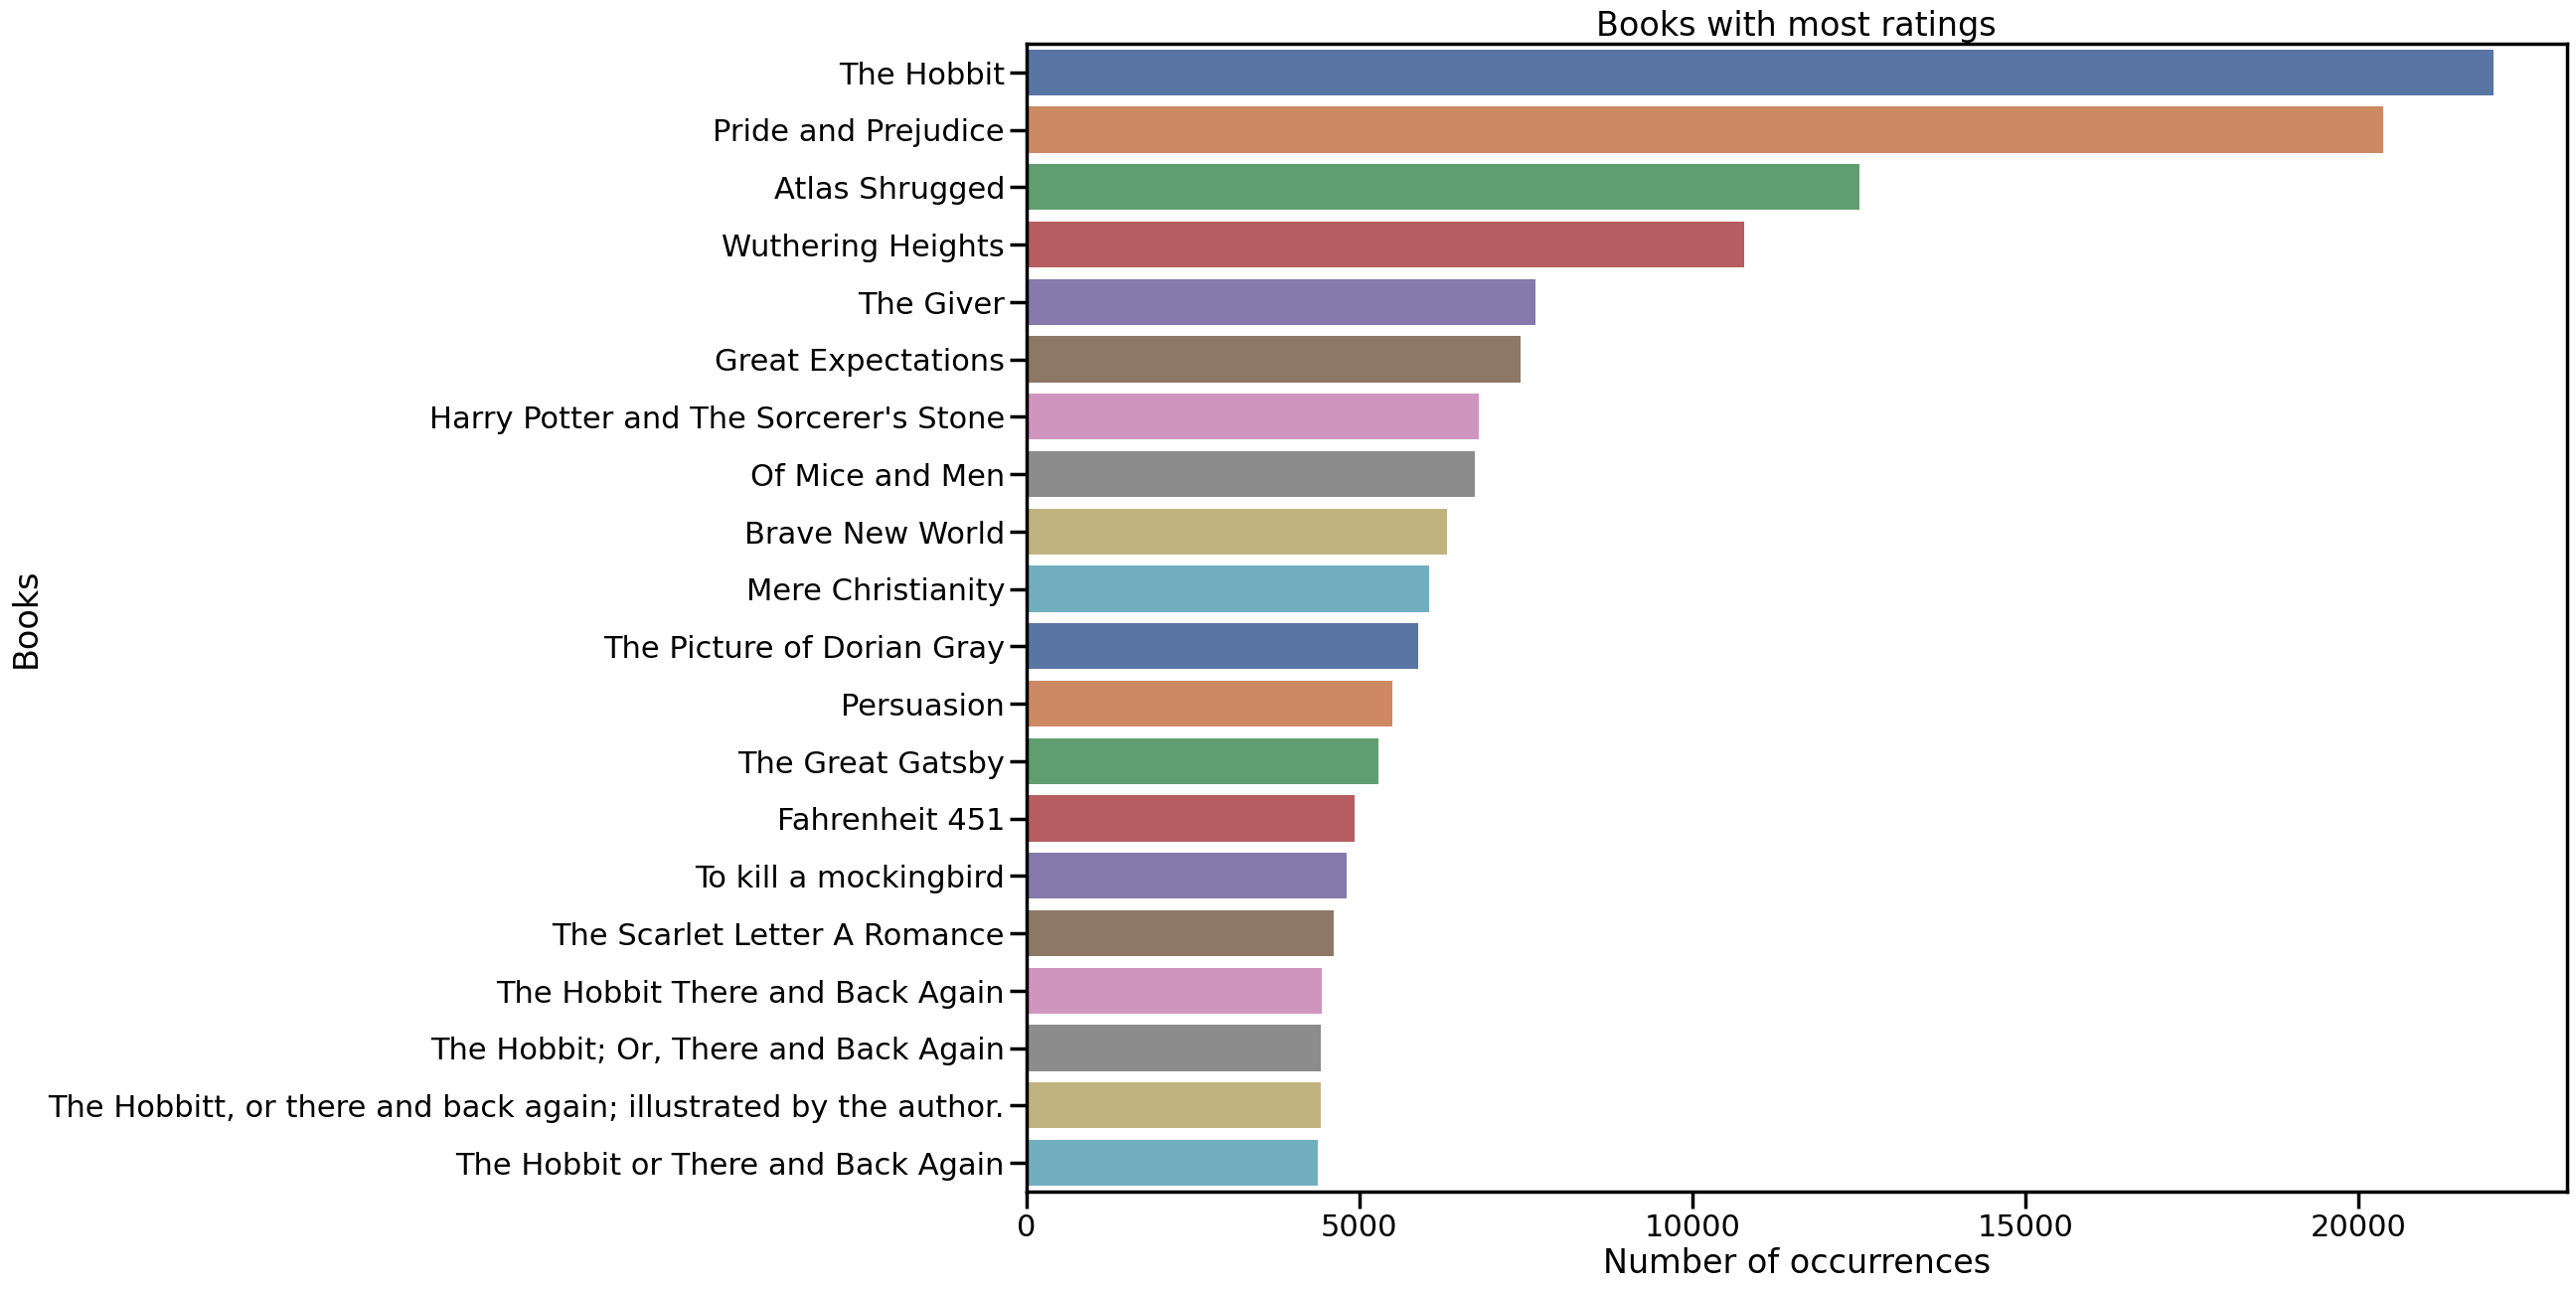

In [57]:
sns.set_context("poster")
plt.figure(figsize = (20,15))
books = book_rating['Title'].value_counts()[:20]
sns.barplot(x=books, y=books.index, palette='deep')
plt.title("Books with most ratings")
plt.xlabel("Number of occurrences")
plt.ylabel("Books")
plt.show()

### Distribution of Ratings

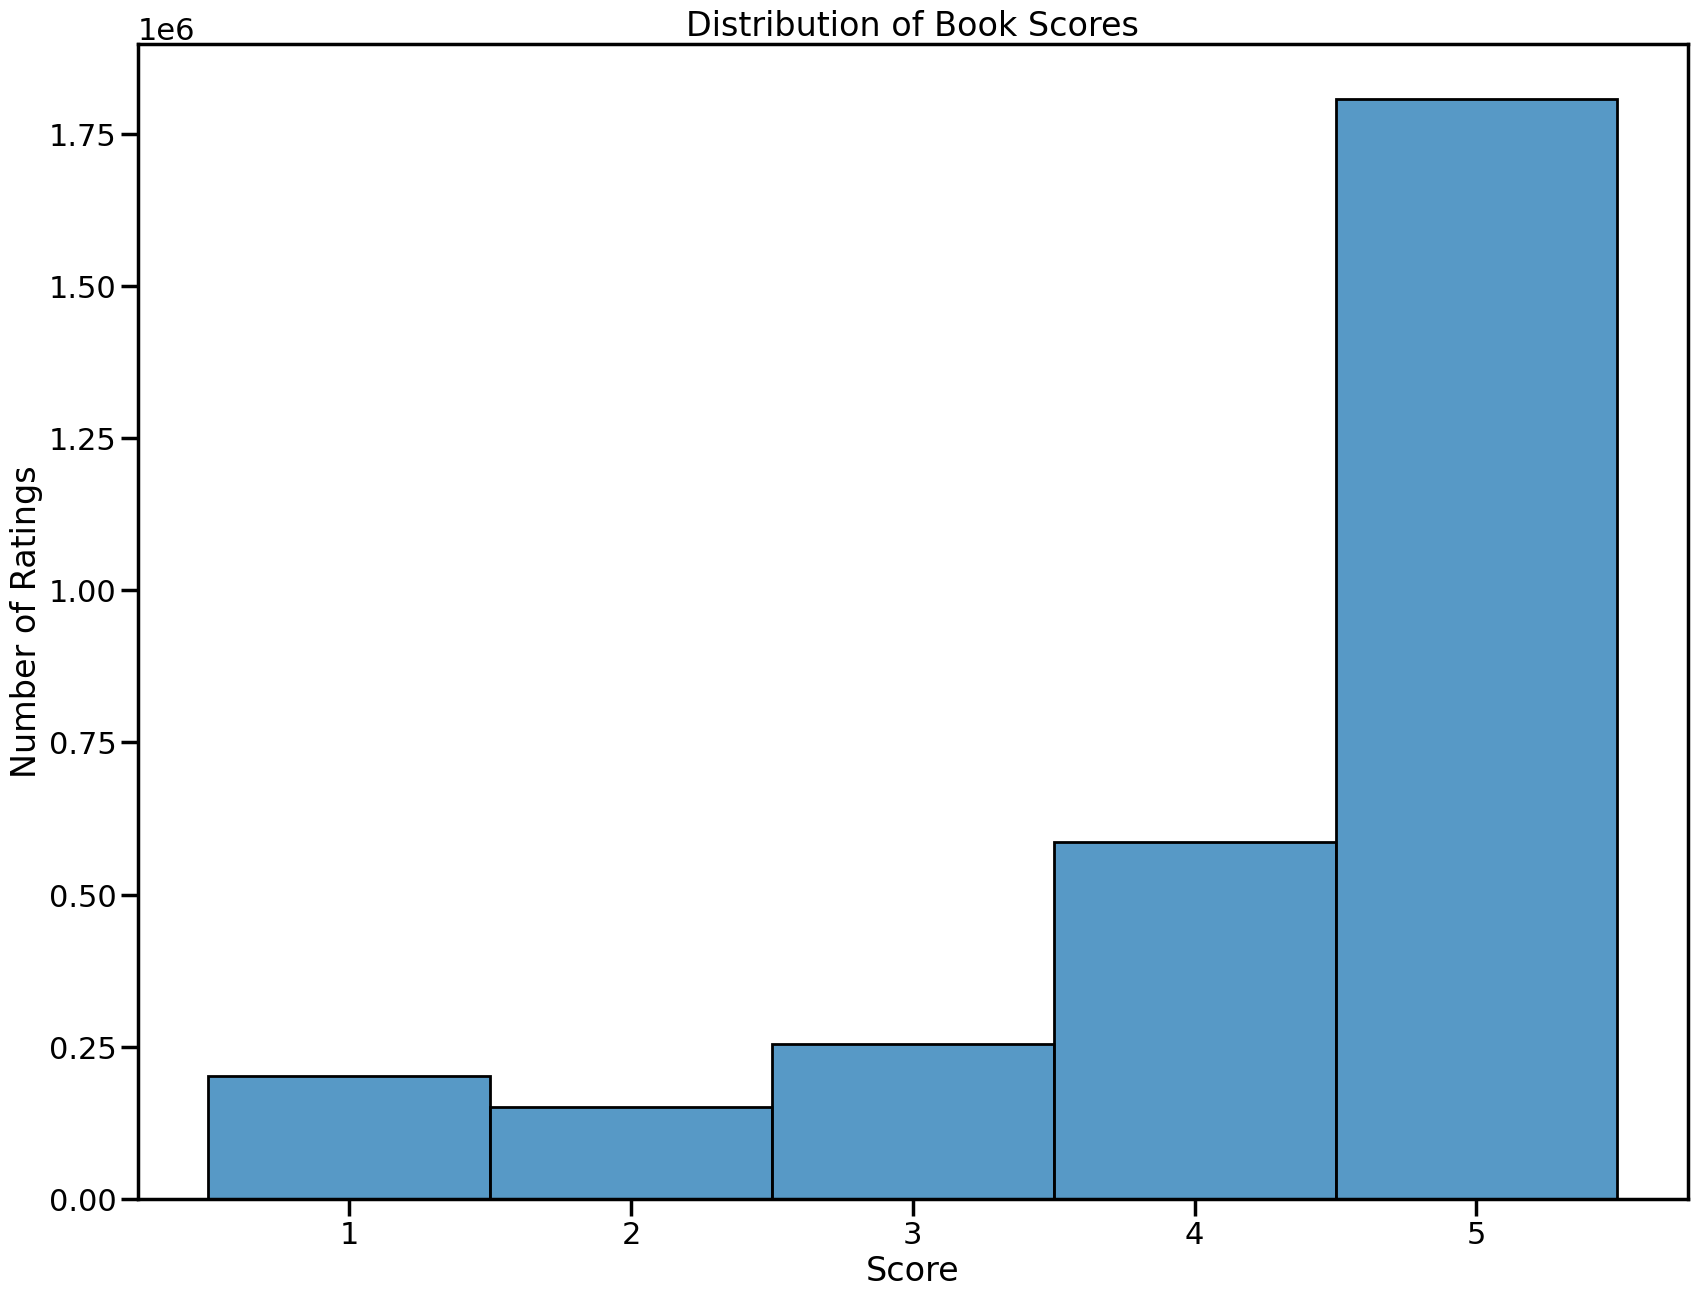

In [60]:
sns.set_context("poster")
plt.figure(figsize=(20, 15))
sns.histplot(book_rating['score'], bins=5, kde=False, palette='deep', discrete=True)
plt.title("Distribution of Book Scores")
plt.xlabel("Score")
plt.ylabel("Number of Ratings")
plt.show()

### Authors with most books

In [58]:
book_data['authors'] = book_data['authors'].fillna('[]')
book_data['authors'] = book_data['authors'].apply(ast.literal_eval)
exploded_authors = book_data.explode('authors')

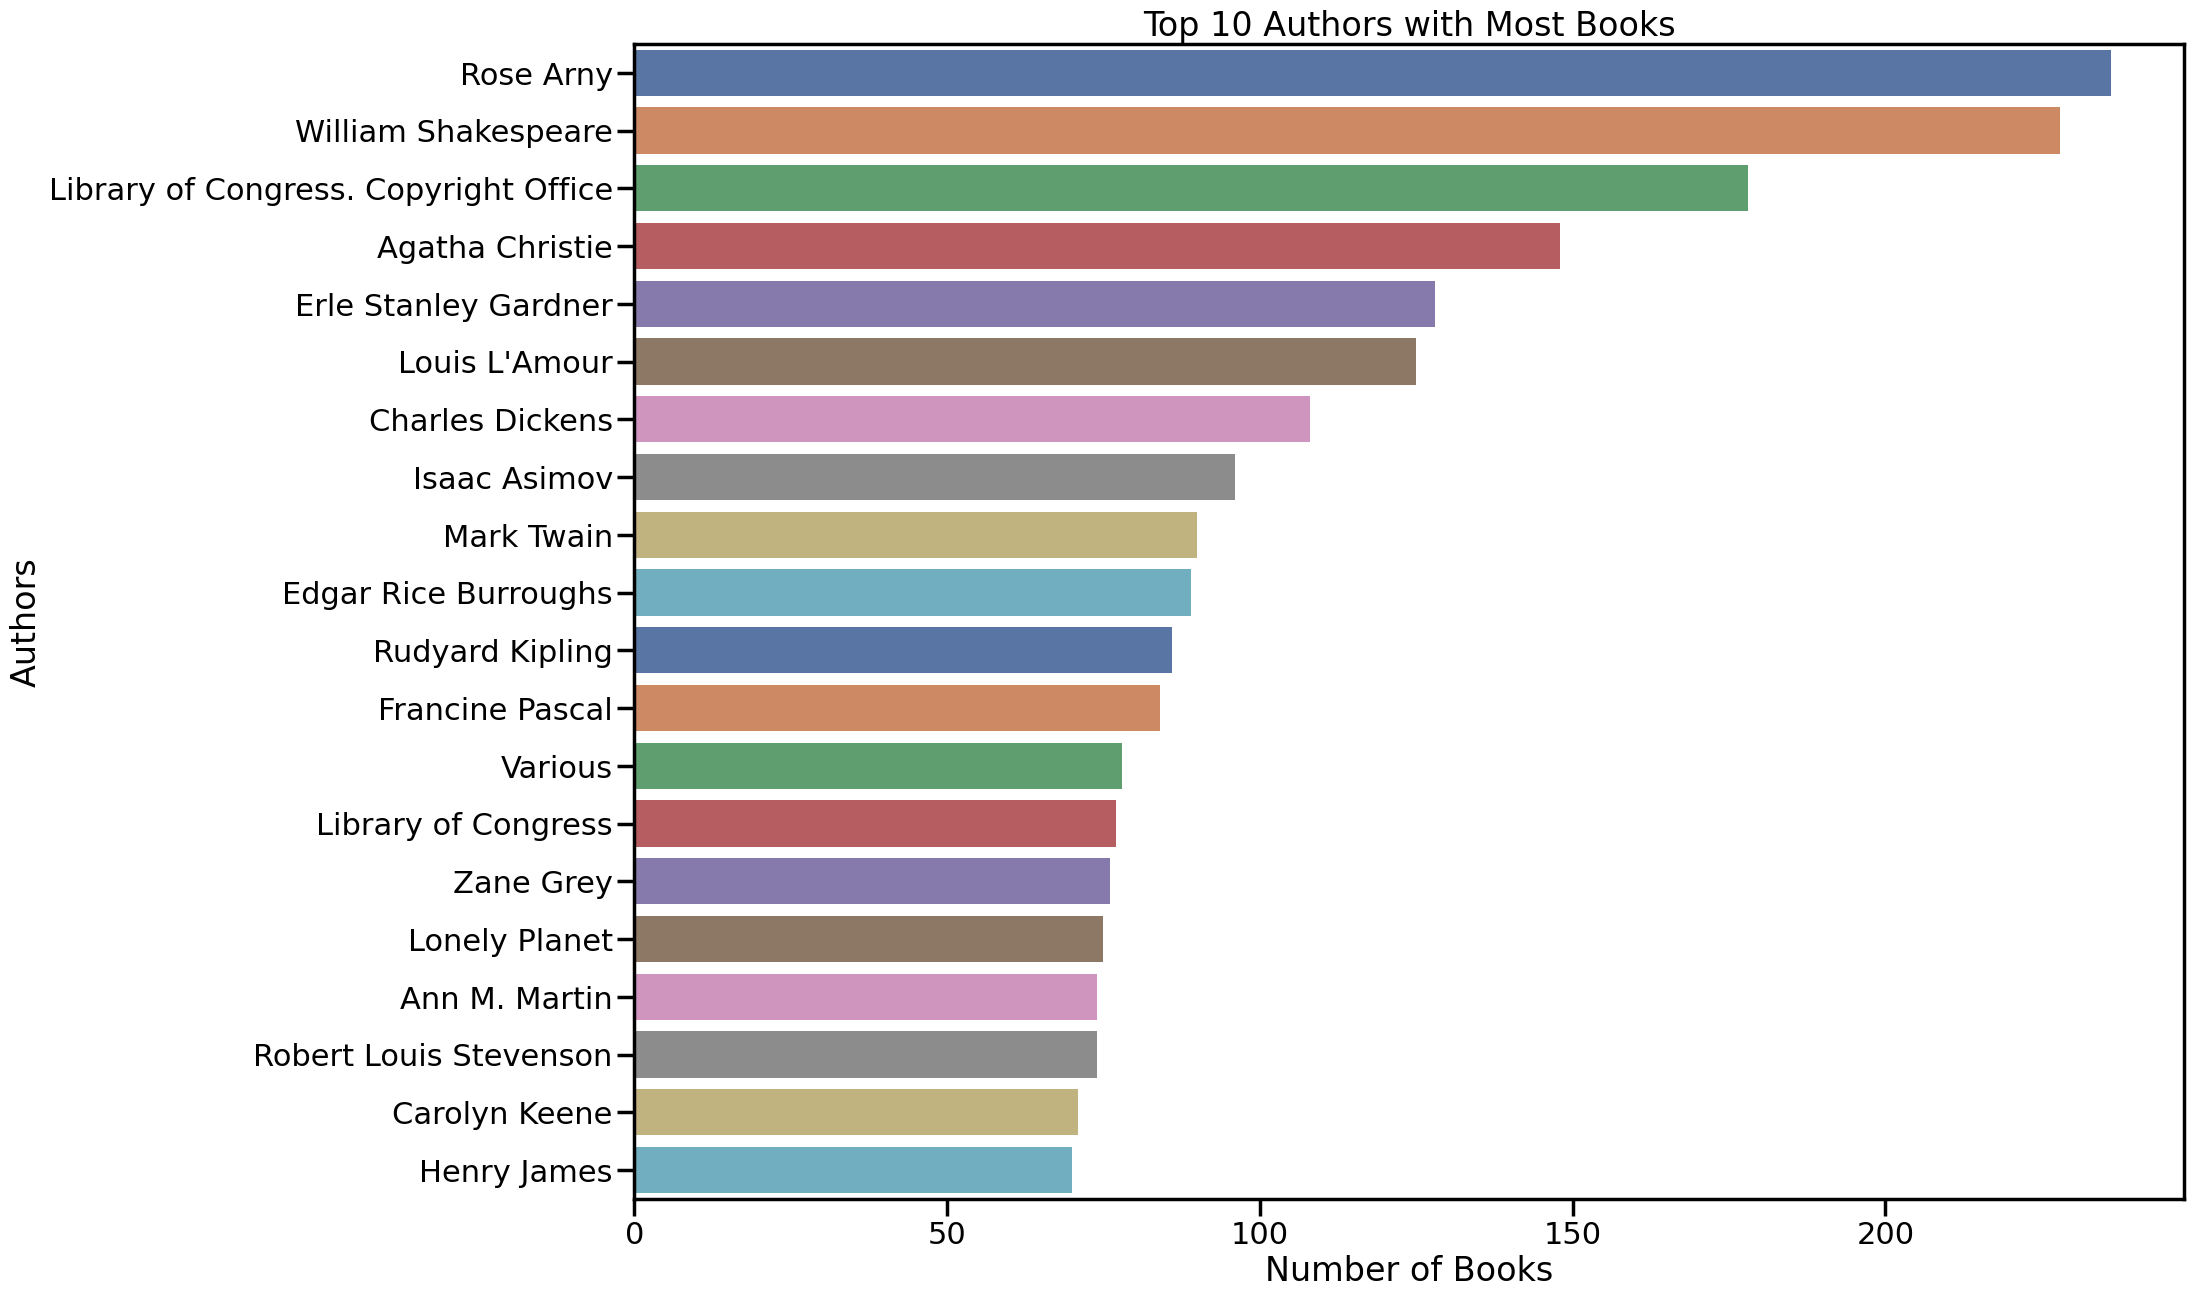

In [59]:
author_counts = exploded_authors['authors'].value_counts().reset_index()
author_counts.columns = ['Author', 'Number of Books']

top_authors = author_counts.head(20)

sns.set_context("poster")
plt.figure(figsize = (20,15))
sns.barplot(x='Number of Books', y='Author', data=top_authors, palette='deep')
plt.title("Top 10 Authors with Most Books")
plt.xlabel("Number of Books")
plt.ylabel("Authors")
plt.show()

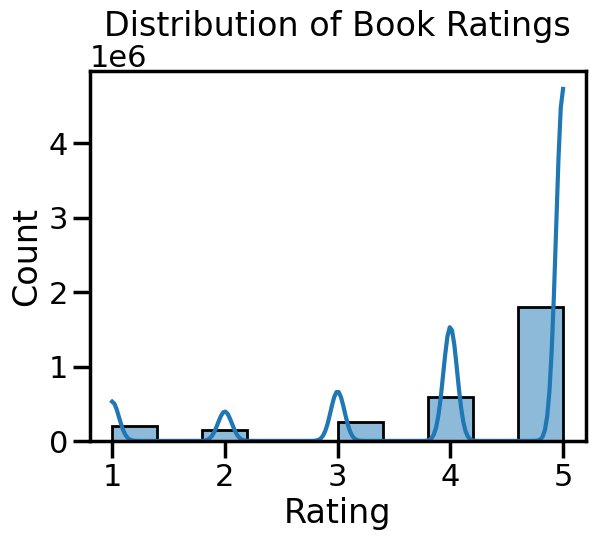

In [28]:
sns.histplot(book_rating['score'], bins=10, kde=True)
plt.title('Distribution of Book Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

### Top Rated Books

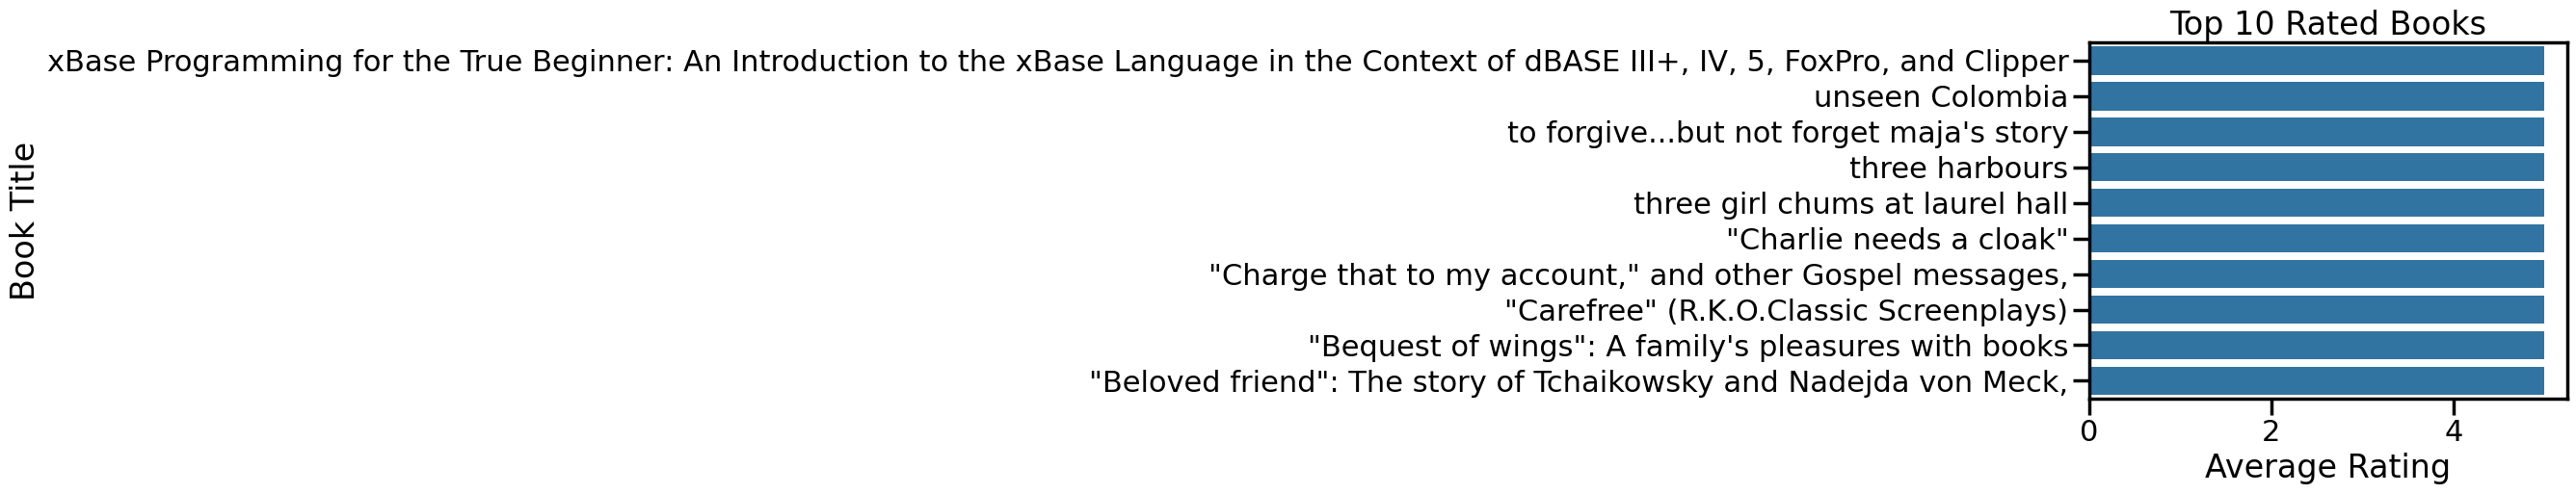

In [30]:
top_rated_books = book_rating.groupby('Title')['score'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=top_rated_books, y=top_rated_books.index)
plt.title('Top 10 Rated Books')
plt.xlabel('Average Rating')
plt.ylabel('Book Title')
plt.show()